# Introduction ➡️

ในปี 2912 มียานขนส่งผู้โดยสาร ชื่อ Spaceship Titanic เดินทางเมื่อเดือนก่อน ด้วยจำนวนผู้โดยสารเกือบ 13,000 คน
โดยจะเดินทางจาก ดาวเคราะห์ในระบบสุริยะไปยังดาวเคราะห์นอกระบบที่อยู่อาศัยได้ 3 ดวง
แต่โชคไม่ดีที่ยานขนส่งผู้โดยสารลำนี้ไปชนเข้ากับความผิดปกติของห้วงเวลาที่ซ่อนอยู่ในกลุ่มเมฆฝุ่น
ทำให้ยานลำนี้พบกับชะตากรรมเดียวกับเรือที่มีชื่อเดียวกันเมื่อ 1000 ปีก่อน
ถึงแม้ว่าสภาพยานจะยังเหมือนเดิม แต่ผู้โดยสารเกือบครึ่งถูกย้ายไปอยู่ในมิติอื่น

#### **โดยโจทย์ของเราคือ** ระบุว่า ผู้โดยสารท่านใดที่ถูกย้ายไปมิติอื่น โดยตอบเป็น **ใช่ (True)** หรือ **ไม่ (False)**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


#### เราจะทำการนำเข้าไลบรารี่ที่จำเป็น โดยเริ่มจาก
1.      `numpy` เป็นไลบรารี่สำหรับการคำนวณทางคณิตศาสตร์ใน python
2.      `pandas` เพื่อใช้ในการโหลดข้อมูลประเภท csv ให้ออกมาในรูปแบบ table เราเรียกสิ่งนี้ว่าการจัด data frame
3.      `seaborn` ในการใช้งานไลบรารี่ matplotlib ในการพล็อตกราฟเพื่อให้ทุกคนเห็นภาพการแจกแจงข้อมูล
4.      `matplotlib` เพื่อใช้ในการพล็อตกราฟออกมา

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data 📥

Import ข้อมูลที่ Spaceship Titanic ให้เรามา โดยมี 2 ส่วนคือ
train data คือส่วนที่ใช้สำหรับสำหรับการสร้างโมเดล
test data คือส่วนที่ใช้สำหรับการทดสอบ


In [3]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

**แสดงจำนวน Row และ Feature ของ Train และ Test**

In [4]:
print("Train size :",train.shape)
print("Test size :",test.shape)

Train size : (8693, 14)
Test size : (4277, 13)


**ทำการเพื่อแสดงประเภทของข้อมูลใน Feature ทั้งหมด**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Feature แต่ละตัวมีความหมายดังนี้
- `PassengerId` รหัสเฉพาะสำหรับผู้โดยสารแต่ละคน ซึ่งแต่ละรหัสจะอยู่ในแบบฟอร์ม gggg_pp เหมือนกันทั้งหมด  ในส่วนของ gggg จะเป็นการระบุกลุ่มที่ผู้โดยสารที่เดินทางโดย Spaceship และในส่วนของ pp จะเป็นการระบุที่นั่งใน Spaceship ซึ่งคนในกลุ่มส่วนใหญ่จะมาทั้งครอบครัว แต่ไม่ก็ไม่ใช่ทั้งหมด
- `HomePlanet` ดาวเคราะห์ต้นทางที่ผู้โดยสารเคยอาศัยอยู่
- `CryoSleep` ผู้โดยสารที่อยู่ในภาวะ CryoSleep
- `Cabin` หมายเลขห้องโดยสารที่ผู้โดยสารเข้าพัก โดยแยกเป็น deck, num และ side
- `Destination` ดาวเคราะห์ที่ผู้โดยสารต้องการจะเดินทางไป
- `Age` อายุของผู้โดยสาร
- `VIP` ผู้โดยสารที่ได้ชำระค่าบริการพิเศษวีไอพีระหว่างการเดินทาง
- `RoomService` ค่าใช้จ่ายในส่วนของ RoomService
- `FoodCourt` ค่าใช้จ่ายในส่วนของ FoodCourt
- `ShoppingMall` ค่าใช้จ่ายในส่วนของ ShoppingMall
- `Spa` ค่าใช้จ่ายในส่วนของ Spa
- `VRDeck` ค่าใช้จ่ายในส่วนของ VRDeck
- `Name` ชื่อและนามสกุลของผู้โดยสาร
- `Transported` เป้าหมายที่พยายามคาดการณ์ว่าผู้โดยสารจะถูกส่งไปยังมิติอื่นหรือไม่ 

# Exploratory Data Analysis (EDA) 🔍

คือการทำการเข้าใจข้อมูลก่อนที่จะทำการปรับค่าต่างๆ ใน dataset
โดยหลักๆ ในโปรเจคนี้เราจะทำ EDA เพื่อจะหาคำตอบเหล่านี้
1. ข้อมูลที่เราได้มาเป็นข้อมูลชนิดไหน เช่น format ของไฟล์, ขนาดของข้อมูล, จำนวน columns, etc.
2. ข้อมูลนี้ซับซ้อนแค่ไหน เช่น ไฟล์แต่ละไฟล์มีความเกี่ยวข้องกันอย่างไร, ข้อมูลมีความซ้ำซ้อนกันไหม
3. ข้อมูลที่ได้มาเพียงพอต่อเป้าหมายของเราหรือไม่ ในที่นี้คือเพียงพอต่อการนำไปทำโมเดลหรือไม่
4. ค่าในข้อมูลมีการขาดหายไปหรือไม่ ถ้าข้อมูลขาดหายไปเราจำเป็นต้องเติมข้อมูลในส่วนที่ขาดหายไปหรือไม่


#### อธิบายข้อมูลโดยสังเขปของ Train

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


โดยมีการแสดงค่าทางสถิติ คือ
- `count` = จำนวน
- `mean` = ค่าเฉลี่ย
- `std` = ค่าเบี่ยงเบนมาตรฐาน
- `min` = จำนวนที่น้อยที่สุด
- `25%` = ค่าเปอร์เซ็นไทล์ที่ 25
- `50%` = ค่าเปอร์เซ็นไทล์ที่ 50
- `75%` = ค่าเปอร์เซ็นไทล์ที่ 75
- `max` = ค่าที่มากที่สุด

In [7]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


แสดงข้อมูลที่หายไปของ Training Set

In [8]:
print("Missing Values Training Set")
train.isna().sum()

Missing Values Training Set


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

สร้าง Pie Chart เพื่อดูปริมาณคนที่ถูกย้ายไปมิติอื่น (`Transported`)

<AxesSubplot:ylabel='Transported'>

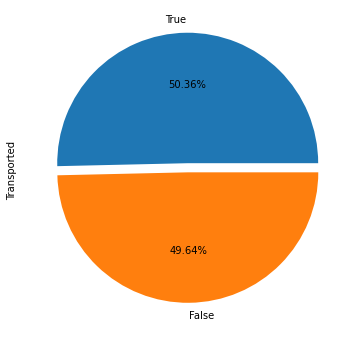

In [9]:
f,ax=plt.subplots(figsize=(6,6))
train['Transported'].value_counts().plot.pie(autopct='%0.2f%%', explode=[0.05,0.02], ax=ax)

สร้าง Bar chart โดยเป็นการเปรียบเทียบว่ามีผู้คนที่โดนย้ายหรือไม่โดนย้ายไปมิติอื่นมาจาก `HomePlanet` ใดบ้าง

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

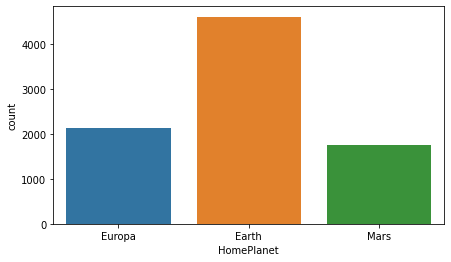

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(data=train, x='HomePlanet')

แสดงค่าและจำนวนที่อยู่ใน `HomePlanet`

In [11]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

สร้าง Histogram โดยเป็นการเปรียบเทียบจำนวนในแต่ละอายุ (`Age`)

<AxesSubplot:xlabel='Age', ylabel='Count'>

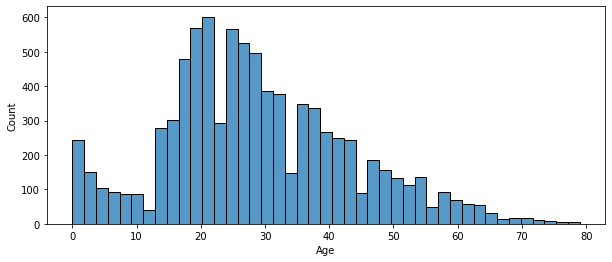

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age')

สร้าง Bar chart โดยเป็นการเปรียบเทียบข้อมูลว่ามีคนถูกย้ายออกไปมีจุดหมายปลายทางที่ดาวดวงไหน (`Destination`)

<AxesSubplot:xlabel='Destination', ylabel='count'>

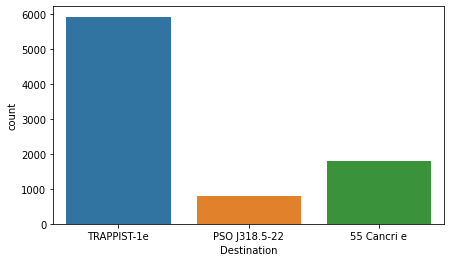

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(data=train, x='Destination')

แสดงค่าและจำนวนที่อยู่ใน `Destination`

In [14]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

สร้าง Bar chart โดยเป็นการเปรียบเทียบของคนที่อยู่ในภาวะ CryoSleep กับกลุ่มคนที่ไม่อยู่ใน CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

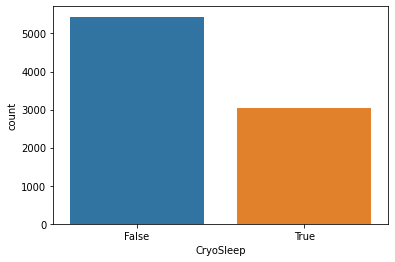

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='CryoSleep')

แสดงค่าและจำนวนที่อยู่ใน `CryoSleep`

In [16]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

สร้าง Bar chart โดยเป็นการเปรียบเทียบของคนที่เป็น VIP กับบุคคลทั่วไป

<AxesSubplot:xlabel='VIP', ylabel='count'>

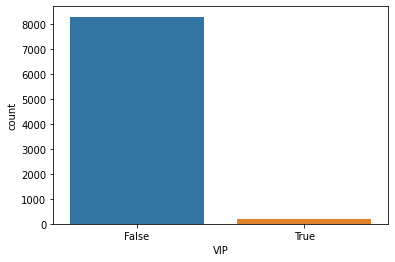

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='VIP')

แสดงค่าและจำนวนที่อยู่ใน `VIP`

In [18]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

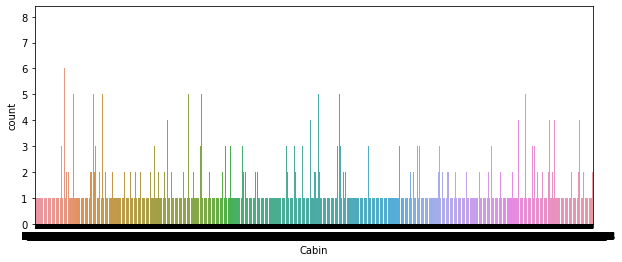

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Cabin')

กราฟแสดงให้เห็นว่าค่าใน Cabin กระจายตัวกันมาก เราจึงจะแทนค่าใน Cabin ด้วย "Z/9999/Z"

สร้าง Bar chart ที่แสดงถึงค่าใช้จ่ายในแต่ละส่วนว่าถูกใช้จ่ายไปเท่าใด โดยจะแสดงค่าใช้จ่ายในส่วนของ `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, และ `VRDeck`

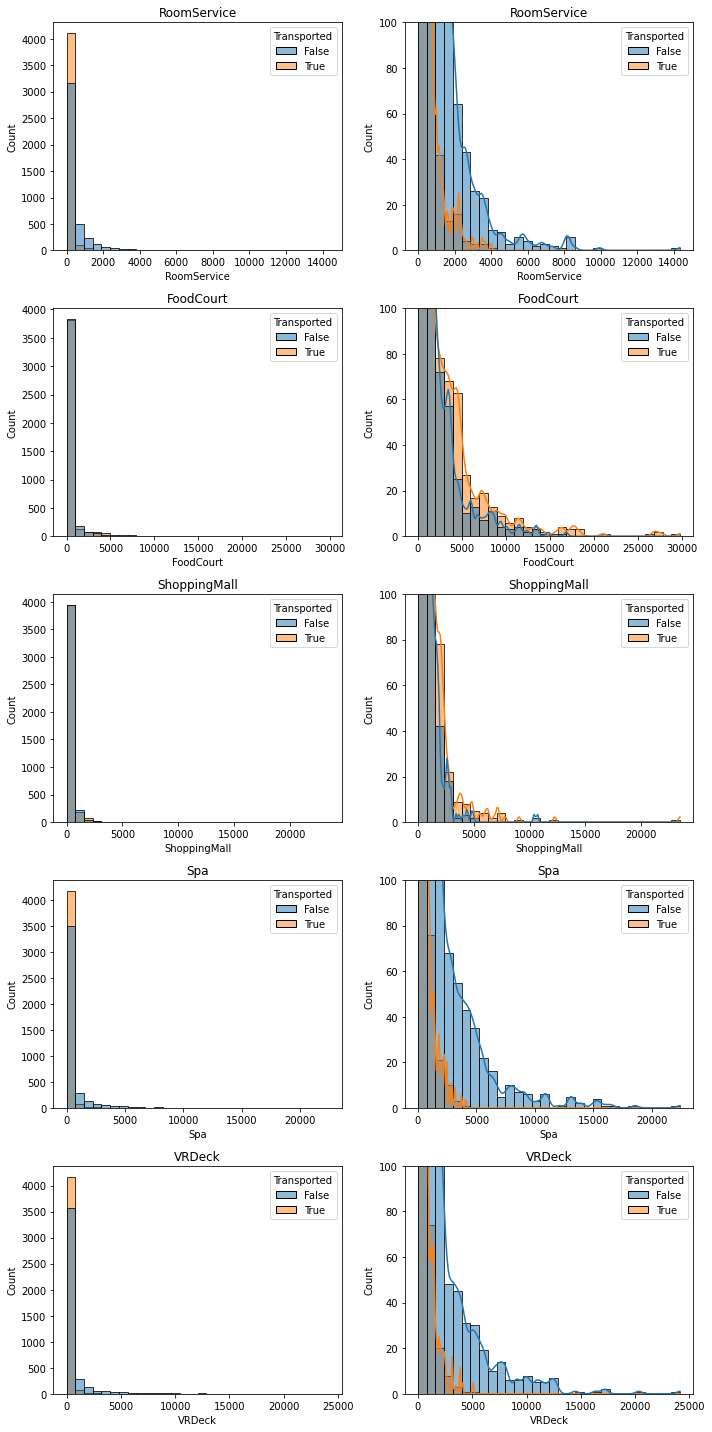

In [20]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

# Data Preprocessing & Feature Engineering 🧰

เติมข้อมูลที่หายไป โดย

ข้อมูลของ `HomePlant`, `CryoSleep`, `Destination`, `VIP` จะเป็นการใช้ข้อมูลที่เป็นฐานนิยมเข้าไปแทนที่

ในส่วนของ `Cabin` จะใช้ค่าที่กำหนดขึ้นมาใหม่ซึ่งก็คือ Z/9999/Z เข้าไปแทนที่เนื่องจากเราไม่ทราบเลขที่แน่นอนของที่นั่ง

ในส่วนของ `Age` จะใช้ค่ากลางอายุของผู้โดยสาร

ในส่วนของ `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` จะใช้ค่า 0 เข้าไปแทน


In [21]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)

train['CryoSleep'].fillna(False, inplace=True)
test['CryoSleep'].fillna(False, inplace=True)

train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)

train['Age'].fillna((train['Age'].median()), inplace=True)
test['Age'].fillna((test['Age'].median()), inplace=True)

train['VIP'].fillna(False, inplace=True)
test['VIP'].fillna(False, inplace=True)

train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

สร้าง Feature ใหม่ที่ชื่อ `TotalSpent` จากการรวมค่าของ `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`

In [22]:
train['TotalSpent'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['TotalSpent'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

สร้าง Feature ใหม่ 3 ตัว ได้แก่ `CabinDeck`, `CabinNum`, `CabinSide` จาก `Cabin` โดยใช้เครื่องหมาย `/` ในการแบ่ง

In [23]:
train[["CabinDeck", "CabinNum", "CabinSide"]] = train["Cabin"].str.split("/", expand=True)
test[["CabinDeck", "CabinNum", "CabinSide"]] = test["Cabin"].str.split("/", expand=True)

สร้างกราฟจาก `CabinDeck` โดยแสดงจำนวนในแต่ละ Deck 

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

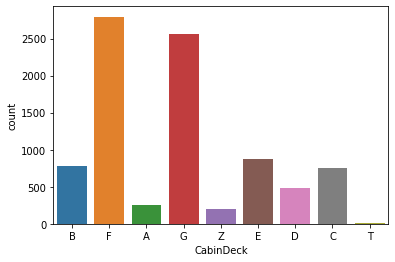

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='CabinDeck')

สร้างกราฟจาก `CabinNum` โดยแสดงจำนวนในแต่ละ Num

<AxesSubplot:xlabel='CabinNum', ylabel='count'>

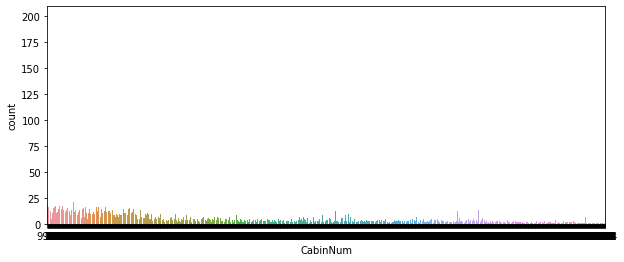

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='CabinNum')

สร้างกราฟจาก `CabinSide` โดยแสดงจำนวนในแต่ละ Cabin

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

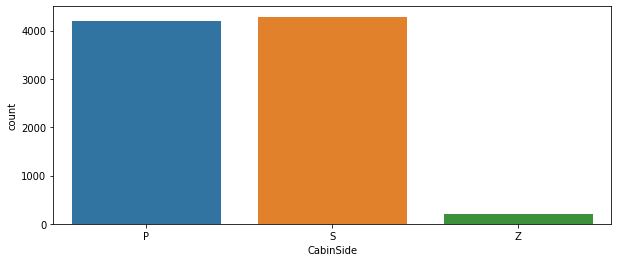

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='CabinSide')

สร้าง Feature ใหม่ 2 ตัว ได้แก่ `Group`, `GroupPos` โดยใช้เครื่องหมาย `_` ในการแบ่ง

In [27]:
train[["Group", "GroupPos"]] = train["PassengerId"].str.split("_", expand=True)
test[["Group", "GroupPos"]] = test["PassengerId"].str.split("_", expand=True)

สร้างกราฟจาก `Group` โดยแสดงจำนวนในแต่ละ Group

<AxesSubplot:xlabel='Group', ylabel='count'>

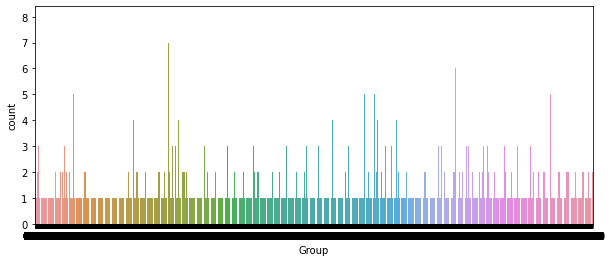

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Group')

สร้างกราฟจาก `GroupPos`

<AxesSubplot:xlabel='GroupPos', ylabel='count'>

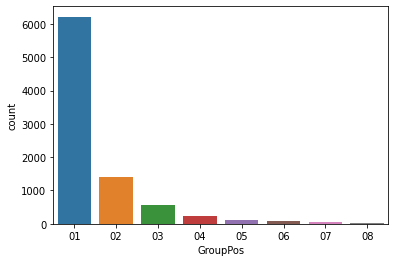

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='GroupPos')

#### แสดงค่าและจำนวนใน `GroupPos`

In [30]:
train['GroupPos'].value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: GroupPos, dtype: int64

#### ทำการสร้างกลุ่มช่วงอายุ `AgeGroup` โดย

อายุน้อยกว่าหรือเท่ากับ 5 เป็นช่วงอายุที่ 0

อายุตั้งแต่ 5 ไปจนถึง 12 เป็นช่วงอายุที่ 1

อายุตั้งแต่ 12 ไปจนถึง 17 เป็นช่วงอายุที่ 2

อายุตั้งแต่ 17 ไปจนถึง 25 เป็นช่วงอายุที่ 3

อายุตั้งแต่ 25 ไปจนถึง 30 เป็นช่วงอายุที่ 4

อายุตั้งแต่ 30 ไปจนถึง 50 เป็นช่วงอายุที่ 5

อายุตั้งแต่ 50 เป็นต้นไป เป็นช่วงอายุที่ 6

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

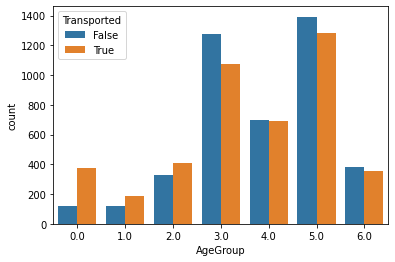

In [31]:
train['AgeGroup'] = np.nan
train.loc[train['Age'] <= 5, 'AgeGroup'] = 0
train.loc[(train['Age'] > 5) & (train['Age'] <= 12), 'AgeGroup'] = 1
train.loc[(train['Age'] > 12) & (train['Age'] <= 17), 'AgeGroup'] = 2
train.loc[(train['Age'] > 17) & (train['Age'] <= 25), 'AgeGroup'] = 3
train.loc[(train['Age'] > 25) & (train['Age'] <= 30), 'AgeGroup'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 50), 'AgeGroup'] = 5
train.loc[train['Age'] > 50, 'AgeGroup'] = 6

test['AgeGroup'] = np.nan
test.loc[test['Age'] <= 5, 'AgeGroup'] = 0
test.loc[(test['Age'] > 5) & (test['Age'] <= 12), 'AgeGroup'] = 1
test.loc[(test['Age'] > 12) & (test['Age'] <= 17), 'AgeGroup'] = 2
test.loc[(test['Age'] > 17) & (test['Age'] <= 25), 'AgeGroup'] = 3
test.loc[(test['Age'] > 25) & (test['Age'] <= 30), 'AgeGroup'] = 4
test.loc[(test['Age'] > 30) & (test['Age'] <= 50), 'AgeGroup'] = 5
test.loc[test['Age'] > 50, 'AgeGroup'] = 6

sns.countplot(data=train, x='AgeGroup', hue='Transported')

# Data Modeling 📑

นำเข้าไลบรารี่ `LableEncoder` จาก `sklearn` เพื่อแปลงข้อมูลให้อยู่ในรูปแบบของตัวเลขในที่นี้เราจะใช้กับตัว Output

ใช้คำสั่ง `.fit_transform` เพื่อเอาข้อมูลมาคำนวณหาค่าเฉลี่ยกับส่วนเบี่ยงเบนมาตราฐานและแปลงให้เป็นค่ามาตราฐาน


In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train['CryoSleep']=label.fit_transform(train['CryoSleep'])
test['CryoSleep']=label.fit_transform(test['CryoSleep'])

train['VIP']=label.fit_transform(train['VIP'])
test['VIP']=label.fit_transform(test['VIP'])

train['Transported']=label.fit_transform(train['Transported'])

นำเข้าไลบรารี่ `OneHotEncoder` จาก `sklearn` เพื่อใช้แปลงข้อมูลที่ถูกเก็บในรูปแบบหมวดหมู่ให้เป็นไบนารี่ที่มีค่าเป็น 0 หรือ 1 เท่านั้น

แปลงข้อมูลที่อยู่ในคอลัมน์จากข้อมูลเชิงคุณภาพให้เป็นข้อมูลเชิงปริมาณเพื่อนำไปใช้ในสมการ Regression โดยใช้ตัวแปร Train กับ Test  
โดยเราจะใช้คำสั่ง `pd.get_dummies` ในการสร้างตัวแปร


In [33]:
from sklearn.preprocessing import OneHotEncoder

train = pd.get_dummies(train, columns = ['HomePlanet','Destination', 'CabinDeck', 'CabinSide'])
train

test = pd.get_dummies(test, columns = ['HomePlanet','Destination', 'CabinDeck', 'CabinSide'])
test

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_Z,CabinSide_P,CabinSide_S,CabinSide_Z
0,0013_01,1,G/3/S,27.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0018_01,0,F/4/S,19.0,0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0019_01,1,C/0/S,31.0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,0021_01,0,C/1/S,38.0,0,0.0,6652.0,0.0,181.0,585.0,...,1,0,0,0,0,0,0,0,1,0
4,0023_01,0,F/5/S,20.0,0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,G/1496/S,34.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4273,9269_01,0,Z/9999/Z,42.0,0,0.0,847.0,17.0,10.0,144.0,...,0,0,0,0,0,0,1,0,0,1
4274,9271_01,1,D/296/P,26.0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4275,9273_01,0,D/297/P,26.0,0,0.0,2680.0,0.0,0.0,523.0,...,0,1,0,0,0,0,0,1,0,0


ใช้คำสั่ง `drop_col` เพื่อตัดข้อมูลที่ไม่ใช้ทิ้ง โดยในที่นี้ตัด `Cabin` `Name` `CabinNum` `Group` และ `PassengerId`

In [34]:
drop_col = ['Cabin', 'Name', 'CabinNum', 'Group', 'PassengerId']
train = train.drop(columns = drop_col)
test = test.drop(columns = drop_col)

#### แสดงข้อมูลที่อยู่ใน `train` และ `test` หลังใช้คำสั่ง `drop_col`

In [35]:
train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'TotalSpent', 'GroupPos', 'AgeGroup',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinDeck_Z', 'CabinSide_P', 'CabinSide_S',
       'CabinSide_Z'],
      dtype='object')

In [36]:
test.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpent', 'GroupPos', 'AgeGroup',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinDeck_Z', 'CabinSide_P', 'CabinSide_S',
       'CabinSide_Z'],
      dtype='object')

สร้าง Array  `X` และ `y` โดยใส่ค่าจาก `Transported`

In [37]:
X = train.drop(columns = ['Transported']).values
y = train['Transported'].values

แปลงค่าใน Array `GroupSize` ของทั้ง `train` และ `test` ให้เป็นค่า int โดยใช้คำสั่ง `.astype(int)`

In [38]:
train['GroupPos'] = train['GroupPos'].astype(int)
test['GroupPos'] = test['GroupPos'].astype(int)

นำเข้าไลบรารี่ `LogisticRegression` `RandomForestClassifier` `GradientBoostingClassifier` `CatBoostClassifier` `SVC`

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

ใช้ `train_test_split` ในการแบ่ง data เป็น test data และ train data

โดย `test_size=0.2` หมายถึงการแบ่งข้อมูลออกเป็น test data 20 ส่วน และ train data 80 ส่วน (เนื่องจากถ้าไม่ได้ใส่ train_size ตัวคำสั่งจะกำหนดค่าให้โดยอัตโนมัติ)

และ `random_state` หมายถึงค่าในการ shuffle ข้อมูลก่อนที่จะทำการแบ่งข้อมูล [[5]](http://)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 29), (6954,), (1739, 29), (1739,))

### **Logistic Regression**

คือการทำ Classification โดย output ตอนแรกออกมาเป็น Regression (จำนวนตัวเลข) จากนั้นนำไป mapping กับ Sigmoid function จะได้ว่าข้อมูลนี้เป็นคลาสนี้หรือไม่เป็น

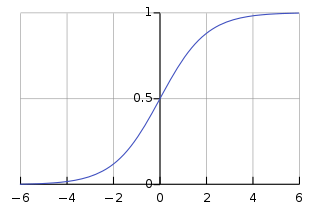

**แกน X คือ ค่า Regression** ที่ทายออกมาได้
**แกน Y คือ ค่าความน่าจะเป็น**ที่จะเป็น Class นั้นๆ อยู่ในช่วง 0–1

ถ้า output ของเราทายออกมาได้ 0
เราเอา Output มาเทียบกับกราฟในรูปก็จะได้แกน Y เป็น 0.5

ถ้าความน่าจะเป็นอยู่ในช่วง 0.0–0.49 หมายความว่าไม่เป็นคลาสนั้น ❌
ถ้าความน่าจะเป็นอยู่ในช่วง 0.49–1.00 หมายความว่าเป็นคลาสนั้น ✔️

In [41]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### **Random Forest Classifier**
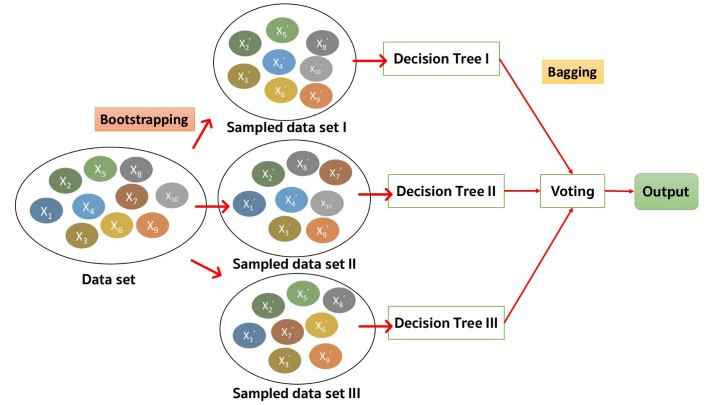

หลักการของ Random Forest คือการสร้าง model จาก Decision Tree หลายๆ model (ตั้งแต่ 10 model ถึง มากกว่า 1000 model)

โดยแต่ละ model จะได้รับ data set ไม่เหมือนกัน ซึ่งเป็น subset ของ data set ทั้งหมด ตอนทำ prediction ก็ให้แต่ละ Decision Tree ทำ prediction ของใครของมัน

โดยคำนวณผล prediction ด้วยการ vote output ที่ถูกเลือกโดย Decision Tree มากที่สุด (กรณี classification) หรือ หาค่า mean จาก output ของแต่ละ Decision Tree (กรณี regression)

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

### **Gradient Boosting Classifier**

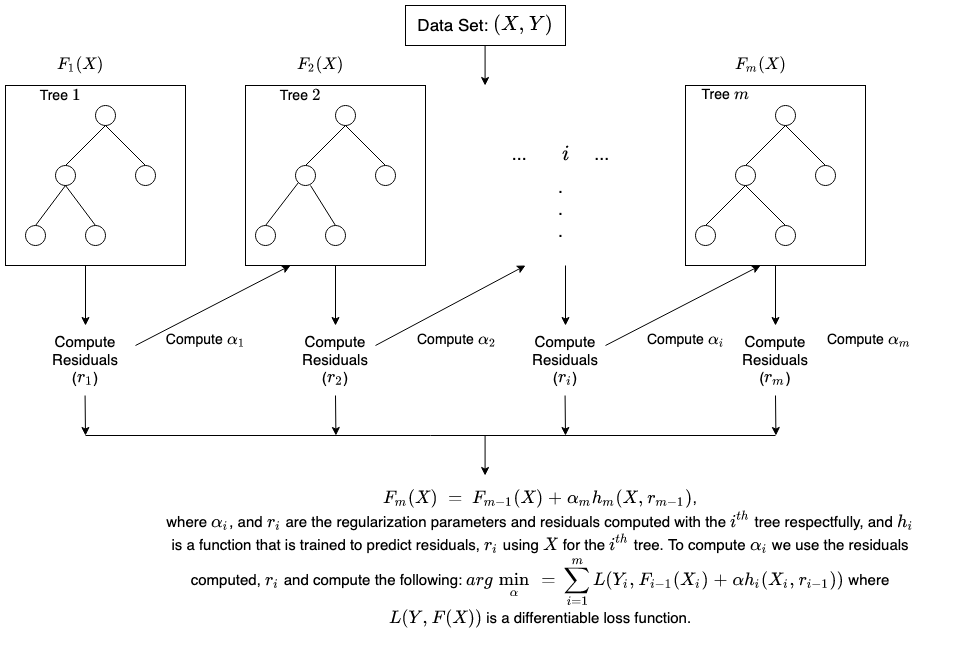

Gradient Boosting เป็น model ที่นำเอา Decision Tree มา train ต่อๆ กันหลายๆ tree โดยที่แต่ละ decision tree จะเรียนรู้จาก error ของ tree ก่อนหน้า

ทำให้ความแม่นยำของในการทำ prediction จะแม่นยำมากขึ้นเรื่อยๆ เมื่อมีการเรียนรู้ของ tree ต่อเนื่องกันจนมีความลึกมากพอ
model จะหยุดเรียนรู้เมื่อไม่เหลือ pattern ของ error จาก tree ก่อนหน้าให้เรียนรู้แล้ว

In [43]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

### **Support Vector Machines (SVM)**

เหมาะกับ dataset ที่มีฟีเจอร์เยอะๆ และมีขนาดข้อมูลเล็กถึงปานกลาง หลักการพื้นฐานคือพยายามหาเส้นแบ่งระหว่างคลาสต่างๆในข้อมูล 

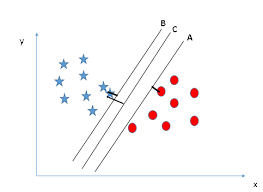

ในตอนที่หาเส้นแบ่งในแต่ละคลาสจะมีหลักการคือพยายามแยก 2 คลาสให้ออกจากกันโดนการลากเส้นตรงกลาง คือเส้น C

แล้วลากเส้นคู่ขนานคือเส้น A,B อะไรก็ตามที่อยู่หลังเส้น A จะเป็นคลาสสีแดง อะไรก็ตามที่อยู่หลังเส้น B จะเป็นคลาสสีฟ้านั้นเอง

In [44]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

### **CatBoost**
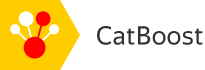

มาจากคำว่า “Category” และ “Boosting” เป็นวิธี Gradient Boosting ชนิดหนึ่ง

ซึ่งถูกพัฒนาเพื่อจัดการกับข้อมูลจำพวกตัวแปรประเภทและเพิ่มประสิทธิภาพการทำงานในแบบจำลองสามารถทำนายได้รวดเร็ว
โดยสามารถจัดการกับตัวแปรโดยอัตโนมัติและไม่ต้องการการแปลงชุดข้อมูลให้เป็นรูปแบบเฉพาะ

CatBoost จะสร้าง model y โดยขึ้นอยู่กับ set ของ features x ด้วยวิธีที่สามารถแก้ปัญหาได้ดีที่สุด (regression, classification, multiclassification)

CatBoost ใช้วิธีอิงจาก Gradient Boosted Decision trees ในขณะที่ทำการ train ข้อมูลอยู่ กลุ่มของ decision trees จะถูกสร้างในขณะเดียวกัน

โดยทุกๆ tree ที่ถูกสร้างขึ้นด้วยค่าความสูญเสียที่ลดลงเมื่อเทียบกับ tree ก่อนหน้า

In [45]:
cb = CatBoostClassifier(verbose=False)
cb.fit(X_train, y_train)
cb_pred_score = cb.score(X_test,y_test)

แสดงค่า Accuracy ของแต่ละ Model โดยเราจะเลือก Model ที่ให้ค่า Accuracy มากที่สุด

In [46]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM',
                              'Catboost'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score,
                                                cb_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.799885
1,Random Forest,0.801035
2,Gradient Boosting,0.801610
3,SVM,0.794710
4,Catboost,0.820587


ทำการดรอป `Transported` ทึ้งก่อนจะนำไปเข้าโมเดล 

In [47]:
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']
X_test = test.copy()

**โดยในที่นี้เราเลือกที่จะใช้ CatBoost เป็น Model ของเรา**

In [48]:
model = CatBoostClassifier(verbose=False)
model.fit(X_train,y_train)
pred = model.predict(X_test)

ทำการอ่าน output ที่ได้จากโมเดล

In [49]:
submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
submission['Transported']=pred.astype(bool)
submission.to_csv('./submission.csv',index=False)

In [50]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Members

น.ส.รดา ดารากร ณ อยุธยา 6309658570      
น.ส.จศิตา สุขเกษม 6309658695                  
นายอภิภู เตชะอาภรณ์ชัย 6309658968        
นายณัฐภัทร ทันอินทรอาจ 6309659008               
นายภูธเนศ คูศิริรัตน์ 6309659073                  
นายวาริศ ดงพระจันทร์ 6309659180

# Reference

**Kaggle Guide**
* https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

**EDA, DP, FE**
* https://medium.com/@ndleah/eda-data-preprocessing-feature-engineering-we-are-different-d2a5fa09f527
* https://www.kaggle.com/code/max1mum/blasted-wormholes-detailed-eda-and-models

**Data Modeling**

int vs astypeint
* https://stackoverflow.com/questions/50302732/int-vs-astypeint-python

train test split
* https://www.sharpsightlabs.com/blog/scikit-train_test_split/

**Logistic Regression**
* https://medium.com/mmp-li/logistic-regression-ไม่มีอะไรเป็นไปตามอย่างที่คิดเสมอ-machine-learning-101-bba2f666234d
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Random Forest Classifier**
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://medium.com/@witchapongdaroontham/เจาะลึก-random-forest-part-2-of-รู้จัก-decision-tree-random-forest-และ-xgboost-79b9f41a1c1c

**Gradient Boosting**
* https://medium.com/@witchapongdaroontham/รู้จัก-decision-tree-random-forrest-และ-xgboost-part-1-cb49c4ac1315
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient+boost#sklearn.ensemble.GradientBoostingClassifier

**SVM**
* https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm
* https://medium.com/mmp-li/svm-อดีตเคยหวานปัจจุบันแอบเซง-machine-learning-101-6008753c780c

**CatBoost**
* https://catboost.ai/
* https://msds.science.swu.ac.th/wp-content/uploads/2022/04/4_63199130122_Sakulkran-Thongkham_37_48.pdf
* https://catboost.ai/en/docs/concepts/algorithm-main-stages




